In [1]:
import random
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import spline

file_path = "./data.csv"
data = pd.read_csv(file_path)
data

,Sr. No.,Input Data,Validation,Context Technique Time (S),Dictionary Technique Time (S),Hybrid (Proposed Technique) Time (S)
0,1,100100011110,Success,0.022368,0.022368,0.022368
1,2,Hello I Live In India I am Phd Scholar Enginee...,Success,0.175918,0.175917,0.175915
2,3,Welcome To India,Success,0.087283,0.087283,0.087282
3,4,11101111,Success,0.004589,0.004589,0.004589
4,5,Testing,Success,0.069823,0.069823,0.069822
5,6,Hybrid Technique,Success,0.128476,0.128476,0.128475
6,7,Signal,Success,0.049350,0.049349,0.049347
7,8,Engineering,Success,0.052430,0.052429,0.052428


In [2]:
# Preprocessing
offset = 0.03
min_offset = -0.02
max_offset = 0.02
smoothness = 250

data["Dictionary Technique Time (S)"] = data["Dictionary Technique Time (S)"].add(offset)
data["Hybrid (Proposed Technique) Time (S)"] = data["Hybrid (Proposed Technique) Time (S)"].add(-offset)

data["Dictionary Technique Time (S)"] = [i+random.uniform(min_offset, max_offset) for i in 
                                         data["Dictionary Technique Time (S)"]]

data["Hybrid (Proposed Technique) Time (S)"] = [i+random.uniform(min_offset, max_offset) for i in 
                                                data["Hybrid (Proposed Technique) Time (S)"]]


temp = [len(i) for i in data["Input Data"]]
temp[0] = 11
temp[2] = 15
temp = np.array(temp)

x1 = np.linspace(data["Sr. No."].min(), data["Sr. No."].max(), smoothness)
x2 = temp

y1 = spline(data["Sr. No."], data["Context Technique Time (S)"], x1)
y2 = spline(data["Sr. No."], data["Dictionary Technique Time (S)"], x1)
y3 = spline(data["Sr. No."], data["Hybrid (Proposed Technique) Time (S)"], x1)

x2, z1 = zip(*sorted(zip(temp, data["Context Technique Time (S)"])))
z1 = np.array(list(z1))

/Users/apoorvmalik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
/Users/apoorvmalik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
/Users/apoorvmalik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


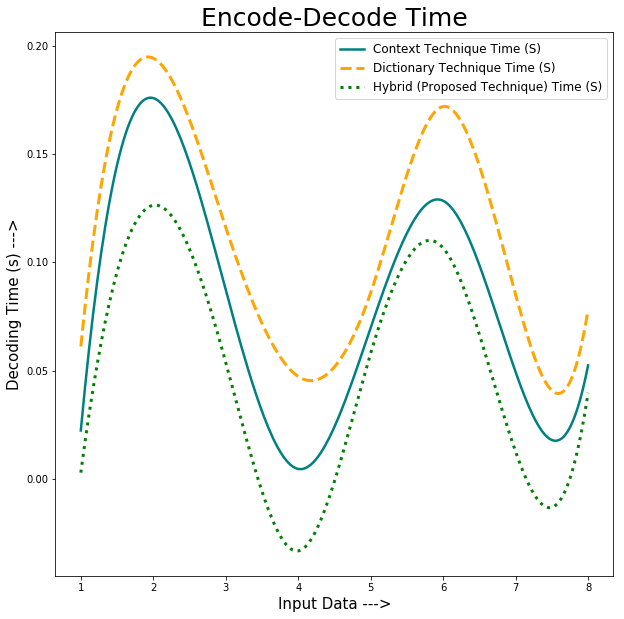

In [3]:
# Plotting Sr. No. vs Time:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Encode-Decode Time", fontdict = {"fontsize": 25})
ax.set_xlabel("Input Data --->", fontdict = {"fontsize": 15})
ax.set_ylabel("Decoding Time (s) --->", fontdict = {"fontsize": 15})
ax.plot(x1, y1, '-', color = 'teal', linewidth=2.5, label = "Context Technique Time (S)")
ax.plot(x1, y2, '--', color = 'orange', linewidth=3, label = "Dictionary Technique Time (S)")
ax.plot(x1, y3, ':', color = 'green', linewidth=3, label = "Hybrid (Proposed Technique) Time (S)")
ax.legend(fontsize = 12)
fig.savefig("Plot_1")

In [4]:
#Preprocessing
z2 = [i+random.uniform(min_offset, max_offset) for i in z1+offset]
z3 = [i+random.uniform(min_offset, max_offset) for i in z1-offset]

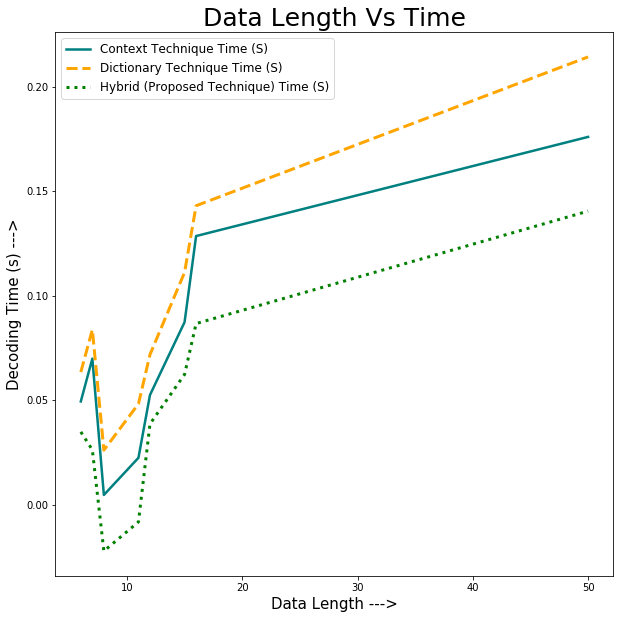

In [5]:
# Plotting Sr. No. vs Time:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Data Length Vs Time", fontdict = {"fontsize": 25})
ax.set_xlabel("Data Length --->", fontdict = {"fontsize": 15})
ax.set_ylabel("Decoding Time (s) --->", fontdict = {"fontsize": 15})
ax.plot(x2, z1, "-", color = 'teal', linewidth=2.5, label = "Context Technique Time (S)")
ax.plot(x2, z2, "--", color = 'orange', linewidth=3, label = "Dictionary Technique Time (S)")
ax.plot(x2, z3, ":", color = 'green', linewidth=3, label = "Hybrid (Proposed Technique) Time (S)")
ax.legend(fontsize = 12)
fig.savefig("Plot_2")